In [23]:
import seaborn as sns
from backend import loader
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [24]:
print("Initializing connection...")

folder_with_data = Path.cwd() / 'data' / 'bicing' / 'truncated'

df_raw = loader.load_per_years(
    folder_with_data,
    [2022],
    pandas_kwargs={'index_col': 0}
)
geo_csv_path = Path.cwd() / 'data' / 'bicing_info.csv'
climate_csv_path = Path.cwd() / 'data' / 'clima.csv'

df_extended = loader.add_festivos(
    Path.cwd() / 'data' / 'festivos',
    loader.add_climate_data(
        climate_csv_path,
        loader.add_geo_data(
            geo_csv_path,
            loader.postprocess(df_raw)
        )
    )
)

Initializing connection...
Post-processing...
Filtering invalid...
Adding features...
Quering invalid...
Adding geo data...
Adding climate data...
Adding festivos...


/Users/pablo.losada/ub/code/projects/capstoneProject/backend/loader.py:108: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(name='date'   )


Initializing connection...
Post-processing...
Filtering invalid...
Adding features...
Quering invalid...
Adding geo data...
Adding climate data...
Adding festivos...


/Users/pablo.losada/ub/code/projects/capstoneProject/backend/loader.py:108: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(name='date'   )


In [25]:
station_ids = [20, 164, 133]

In [26]:
Y_COLUMN='percentage_docks_available'

In [27]:
quantile_50_temp = df_extended.temperature_2m.quantile(0.5)
quantile_50_temp

290.5887145996094

290.5887145996094

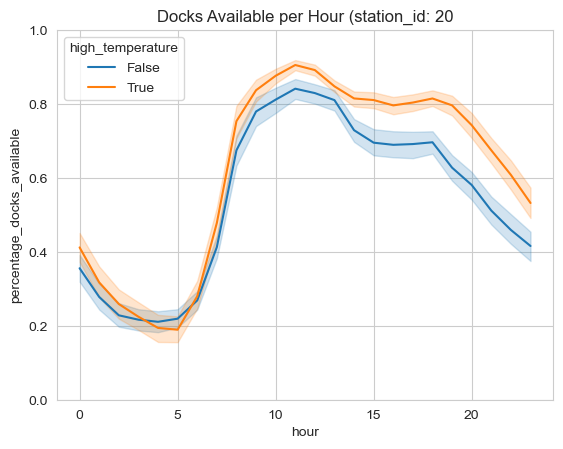

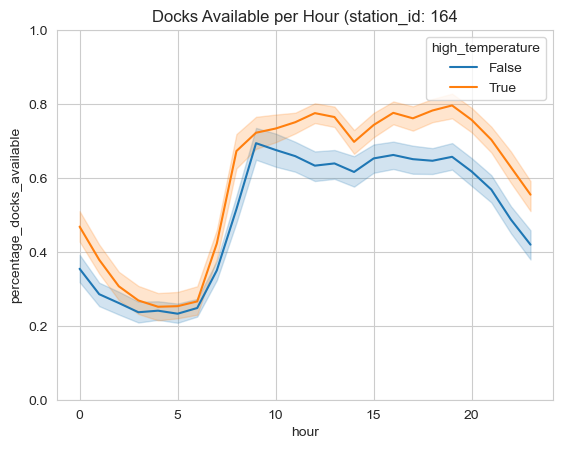

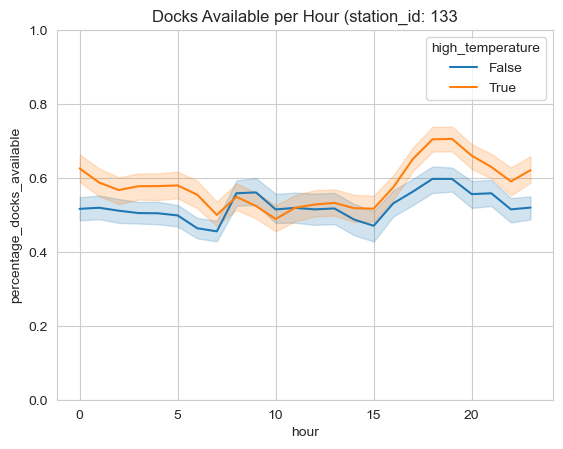

In [32]:
for station in station_ids:
    df_ = df_extended.query(f'station_id == {station}')
    ax = sns.lineplot(
        data=df_.assign(high_temperature=df_extended.temperature_2m > quantile_50_temp),
        x='hour',
        y='percentage_docks_available',
        hue='high_temperature'
    )
    ax.set_ylim([0, 1])
    ax.set(
        title=f'Docks Available per Hour (station_id: {station})'
    )
    plt.show()